In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline
import warnings 
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inline` not found.


In [16]:
df=pd.read_csv('chennai_house_price_prediction.csv')

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

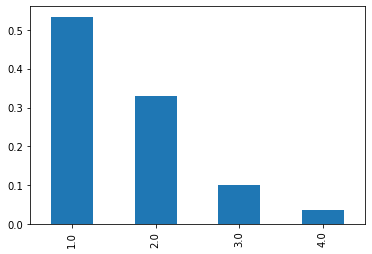

In [9]:
(df['N_BEDROOM'].value_counts()/len(df['N_BEDROOM'])).plot.bar()

In [11]:
df['N_BATHROOM'].mean()

1.213260135135135

In [18]:
for i in range(len(df['N_BATHROOM'])):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        df['N_BATHROOM'][i]=2.0
        


D:\Anaconda setup\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1520
Name: N_BATHROOM, dtype: int64

In [23]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [28]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp

BUILDTYPE   PARK_FACIL
Comercial   No            12617700.0
            Yes            7346750.0
Commercial  No            12695370.0
            Yes           13926030.0
House       No             8516800.0
            Noo            6468090.0
            Yes            9468150.0
Other       No             7138467.5
            Yes           10148412.5
Others      No             9144840.0
            Noo            8535580.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

In [30]:
df.groupby('AREA')['SALES_PRICE'].median()

AREA
Adyar          8871195
Adyr           9044045
Ana Nagar     20020970
Ann Nagar     13488705
Anna Nagar    13714220
Chormpet       9593035
Chrmpet        8276185
Chrompet       9607900
Chrompt        9668900
KK Nagar      12144630
KKNagar       13117020
Karapakam      7284250
Karapakkam     7040500
T Nagar       14051070
TNagar        13922760
Velachery     10494410
Velchery      11389380
Name: SALES_PRICE, dtype: int64

In [35]:
df.pivot_table(values='SALES_PRICE',index='AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8871195
Adyr,9044045
Ana Nagar,20020970
Ann Nagar,13488705
Anna Nagar,13714220
Chormpet,9593035
Chrmpet,8276185
Chrompet,9607900
Chrompt,9668900


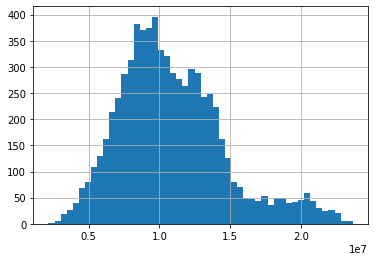

In [45]:
df['SALES_PRICE'].loc[(df['SALES_PRICE']>180000)].hist(bins=50)